In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2024-05-08 03:05:32.369841: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 03:05:32.369974: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 03:05:32.550414: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


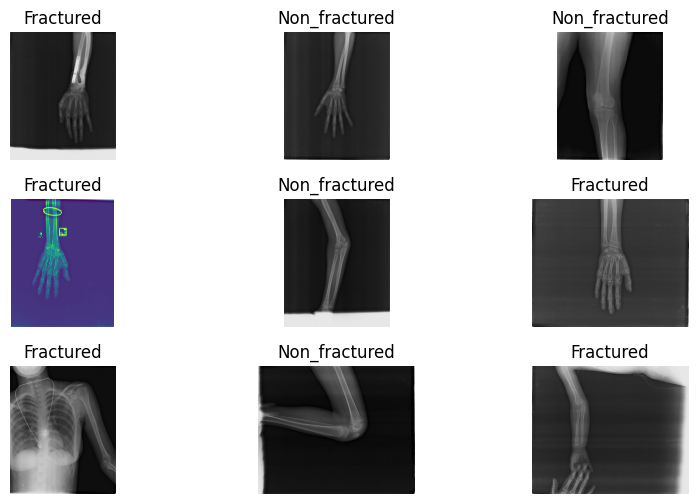

In [2]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
main_dir = '/kaggle/input/cnn-for-bone-fractures-dataset/FracAtlas/images'
labels = ['Fractured','Non_fractured']
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
for ax in axes.flatten():
    label = random.choice(labels)
    class_folder = os.path.join(main_dir, label)
    image_files = os.listdir(class_folder)
    random_image = random.choice(image_files)
    image_path = os.path.join(class_folder, random_image)
    image = Image.open(image_path)
    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

In [3]:

data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2

)

# second step is creating data generators to apply the augmentation:

train_generator = data_gen.flow_from_directory(
    main_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
    
)

test_generator = data_gen.flow_from_directory(
    main_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3267 images belonging to 2 classes.
Found 816 images belonging to 2 classes.


In [5]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(train_generator, epochs=20, validation_data=test_generator)

Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.8081 - loss: 0.5190 - val_accuracy: 0.8027 - val_loss: 0.4869
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.8463 - loss: 0.3891 - val_accuracy: 0.6618 - val_loss: 0.6790
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.8536 - loss: 0.3770 - val_accuracy: 0.7733 - val_loss: 0.5399
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.8586 - loss: 0.3797 - val_accuracy: 0.7255 - val_loss: 0.6375
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.8564 - loss: 0.3777 - val_accuracy: 0.6262 - val_loss: 1.0089
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8672 - loss: 0.3569 - val_accuracy: 0.5895 - val_loss: 0.9689
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8611 - loss: 0.3546 - val_accuracy: 0.6716 - val_loss: 0.8064
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.8805 - loss: 0.3340 - val_accu

In [9]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Training Accuracy (Epoch 20):", final_train_accuracy)
print("Final Validation Accuracy (Epoch 20):", final_val_accuracy)


Final Training Accuracy (Epoch 20): 0.9103152751922607
Final Validation Accuracy (Epoch 20): 0.6507353186607361


Previous Trainings on the same dataset by other people:  
103/103 ━━━━━━━━━━━━━━━━━━━━ 73s 677ms/step - **accuracy: 0.8683** - loss: 0.3529 - val_accuracy: 0.7414 - val_loss: 0.6749

our Training:
103/103 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - **accuracy: 0.9108** - loss: 0.2396 - val_accuracy: 0.6507 - val_loss: 1.3760

Reducing Overfitting

In [11]:
from keras.layers import Dropout

# Define the model architecture with dropout layers
modelWithoutOverfitting = Sequential()

modelWithoutOverfitting.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
modelWithoutOverfitting.add(MaxPooling2D((2, 2)))
modelWithoutOverfitting.add(Dropout(0.25))  # Adding dropout layer

modelWithoutOverfitting.add(Conv2D(64, (3, 3), activation='relu'))
modelWithoutOverfitting.add(MaxPooling2D((2, 2)))
modelWithoutOverfitting.add(Dropout(0.25))  # Adding dropout layer

modelWithoutOverfitting.add(Conv2D(128, (3, 3), activation='relu'))
modelWithoutOverfitting.add(MaxPooling2D((2, 2)))
modelWithoutOverfitting.add(Dropout(0.25))  # Adding dropout layer

modelWithoutOverfitting.add(Flatten())
modelWithoutOverfitting.add(Dense(128, activation='relu'))
modelWithoutOverfitting.add(Dropout(0.5))  # Adding dropout layer
modelWithoutOverfitting.add(Dense(2, activation='softmax'))


In [12]:
modelWithoutOverfitting.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
history = modelWithoutOverfitting.fit(train_generator, epochs=20, validation_data=test_generator)

Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.7799 - loss: 0.7502 - val_accuracy: 0.8248 - val_loss: 0.4571
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.8182 - loss: 0.4732 - val_accuracy: 0.7953 - val_loss: 0.4875
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.8388 - loss: 0.4181 - val_accuracy: 0.7917 - val_loss: 0.4939
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.8486 - loss: 0.3983 - val_accuracy: 0.7745 - val_loss: 0.5180
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.8599 - loss: 0.3855 - val_accuracy: 0.7843 - val_loss: 0.5253
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.8350 - loss: 0.4114 - val_accuracy: 0.7488 - val_loss: 0.5745
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.8525 - loss: 0.3945 - val_accuracy: 0.7733 - val_loss: 0.5533
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.8593 - loss: 0.3722 - val_accu

In [14]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Training Accuracy (Epoch 20):", final_train_accuracy)
print("Final Validation Accuracy (Epoch 20):", final_val_accuracy)

Final Training Accuracy (Epoch 20): 0.8650137782096863
Final Validation Accuracy (Epoch 20): 0.6960784196853638


In [15]:
# Save the original model without dropout layers
model.save("original_model.h5")

In [16]:
# Save the model with dropout layers
modelWithoutOverfitting.save("model_with_dropout.h5")